# Merging Data

Correlations with the coefficients. This is further explained in the draft report

IMPORTANT: this version of the `melb_weather` DataFrame does not have the outliers removed

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#variable and file names
melb = 'monthly_rain','max_temp','min_temp'
melb_wide = ['data/monthly_rain_wide','data/max_temp_wide','data/min_temp_wide']
file_names = ["data/MelbourneRainfall.csv","data/MelbourneMaxTemp.csv","data/MelbourneMinTemp.csv"]

#loop for wide dataframes
for i in range(3):
    globals()[melb_wide[i]] = pd.read_csv(file_names[i],names = ['Product code', 'Station Number','Year',1,2,3,4,5,6,7,8,9,10,11,12,'Annual'])

#loop for melted dataframes
for i in range(3):
    globals()[melb[i]] = globals()[melb_wide[i]].set_index('Year').rename_axis('Month', axis=1).melt(value_vars=[1,2,3,4,5,6,7,8,9,10,11,12], ignore_index=False).rename({'value': melb[i]}, axis=1).reset_index(level=['Year'])
    globals()[melb[i]] = globals()[melb[i]][globals()[melb[i]]['Year']!='Year'].reset_index().drop('index',axis=1)
    globals()[melb[i]]['Year'] = pd.to_numeric(globals()[melb[i]]['Year'])


In [11]:
#variable and file names
drivers = ['dmi','newsam','nino','soi']
drivers_wide = ['data/dmi_wide','data/newsam_wide','data/nino_wide','data/soi_wide']
file_names = ['data/dmi.had.long.data.txt','data/newsam.1957.2007.txt','data/nino34.long.anom.data.txt','data/soi.txt']

#loop for wide dataframes
for i in range(4):
    globals()[drivers_wide[i]]=pd.read_csv(file_names[i], names = ['Year',1,2,3,4,5,6,7,8,9,10,11,12],delim_whitespace=True)
    
#loop for melted dataframes
for i in range(4):
    globals()[drivers[i]] = globals()[drivers_wide[i]].set_index('Year').rename_axis('Month', axis=1).melt(value_vars=[1,2,3,4,5,6,7,8,9,10,11,12], ignore_index=False).rename({'value': drivers[i]}, axis=1).reset_index(level=['Year'])
    if type(globals()[drivers[i]].iloc[0,1])!=np.float64:
        globals()[drivers[i]] = globals()[drivers[i]].iloc[1: , :]
        globals()[drivers[i]] = globals()[drivers[i]][globals()[drivers[i]]['Year']!='YEAR'].reset_index().drop('index',axis=1)
    globals()[drivers[i]]['Year'] = pd.to_numeric(globals()[drivers[i]]['Year'])

In [12]:
#merging dataframes
melb_weather = pd.merge(monthly_rain, max_temp,how='left').merge(min_temp,how='left').merge(dmi,how='left').merge(newsam,how='left').merge(nino,how='left').merge(soi,how='left').dropna(axis=0).reset_index().drop('index',axis=1)

melb_weather.dtypes

Year              int64
Month            object
monthly_rain     object
max_temp         object
min_temp         object
dmi             float64
newsam           object
nino            float64
soi              object
dtype: object

In [13]:
#adding a datetime column
melb_weather['Year']=melb_weather['Year'].map(str)
melb_weather['Month']=melb_weather['Month'].map(str)
melb_weather["Date"] = melb_weather["Year"]+ '-'+melb_weather["Month"]
melb_weather['Date'] = pd.to_datetime(melb_weather['Date'],format='%Y-%m')
melb_weather = melb_weather.sort_values(by="Date")
melb_weather = melb_weather[['Date','Year','Month','monthly_rain','max_temp','min_temp','dmi','newsam','nino','soi']].reset_index().drop('index',axis=1)

#making all values the same data type
for i in ['Year','Month','monthly_rain','max_temp','min_temp','newsam','soi']:
    melb_weather[i] = pd.to_numeric(melb_weather[i])

melb_weather

,Date,Year,Month,monthly_rain,max_temp,min_temp,dmi,newsam,nino,soi
0,1957-01-01,1957,1,6.8,25.8,11.8,-0.371,-0.87,-0.56,0.6
1,1957-02-01,1957,2,30.0,25.9,13.7,-0.484,-2.27,-0.24,-0.1
2,1957-03-01,1957,3,37.4,23.4,11.8,-0.097,0.07,0.08,0.2
3,1957-04-01,1957,4,29.4,20.7,10.1,-0.225,-1.97,0.42,0.2
4,1957-05-01,1957,5,44.2,16.8,8.0,-0.247,-2.50,0.45,-0.7
...,...,...,...,...,...,...,...,...,...,...
762,2020-08-01,2020,8,61.6,15.1,7.6,-0.070,-2.20,-0.42,1.1
763,2020-09-01,2020,9,33.6,18.1,9.8,-0.084,-0.25,-0.66,0.9
764,2020-10-01,2020,10,74.2,19.1,10.9,0.233,1.79,-1.19,0.5
765,2020-11-01,2020,11,48.8,24.5,14.0,0.143,1.14,-1.01,0.7


In [14]:
#calculating monthly averages and creating a dataframe to store values
melb_climat = pd.DataFrame(index= melb_weather['Month'].unique(), columns = ['max_temp','min_temp','monthly_rain'])

for month in melb_weather['Month'].unique():
    max_temp_avg = melb_weather[melb_weather['Month']==month]['max_temp'].mean()
    min_temp_avg = melb_weather[melb_weather['Month']==month]['min_temp'].mean()
    monthly_rain_avg = melb_weather[melb_weather['Month']==month]['monthly_rain'].mean()
    melb_climat['max_temp'][month] = max_temp_avg
    melb_climat['min_temp'][month] = min_temp_avg
    melb_climat['monthly_rain'][month] = monthly_rain_avg
    
#updatting max_temp, min_temp and monthly_rainfall values to show anomalies
melb_anom = melb_weather.copy()

for month in melb_weather['Month'].unique():
    melb_anom.loc[melb_anom['Month']==month, 'max_temp']-=melb_climat['max_temp'][month]
    melb_anom.loc[melb_anom['Month']==month, 'min_temp']-=melb_climat['min_temp'][month]
    melb_anom.loc[melb_anom['Month']==month, 'monthly_rain']-=melb_climat['monthly_rain'][month]
    
melb_anom

,Date,Year,Month,monthly_rain,max_temp,min_temp,dmi,newsam,nino,soi
0,1957-01-01,1957,1,-38.662500,-0.578125,-3.725000,-0.371,-0.87,-0.56,0.6
1,1957-02-01,1957,2,-16.635937,-0.401563,-2.109375,-0.484,-2.27,-0.24,-0.1
2,1957-03-01,1957,3,-3.240625,-0.892188,-2.509375,-0.097,0.07,0.08,0.2
3,1957-04-01,1957,4,-25.100000,-0.109375,-1.589062,-0.225,-1.97,0.42,0.2
4,1957-05-01,1957,5,-12.928125,-0.448437,-1.576562,-0.247,-2.50,0.45,-0.7
...,...,...,...,...,...,...,...,...,...,...
762,2020-08-01,2020,8,8.451562,-0.232812,0.040625,-0.070,-2.20,-0.42,1.1
763,2020-09-01,2020,9,-20.970312,0.582813,0.892188,-0.084,-0.25,-0.66,0.9
764,2020-10-01,2020,10,14.065079,-0.938095,0.398413,0.233,1.79,-1.19,0.5
765,2020-11-01,2020,11,-11.020313,2.162500,1.690625,0.143,1.14,-1.01,0.7


# TRAINING, ACCURACY COMPARISON AND MODELLING

In [15]:
from sklearn.linear_model import LinearRegression # linear regression model
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.metrics import r2_score # for comparing the predicted and test values

# MIN TEMP AGAINST DRIVERS AND MONTH

In [16]:
X = melb_anom[['Month','newsam','dmi','nino','soi']]
Y = melb_anom[['min_temp']]

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42) 

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model

print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))


training_score_MIN = linear.score(X_train,Y_train) # calculate rsq for the training set
# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear_MIN = r2_score(Y_test,preds_linear) 
# print the training and testing scores
print("Training score is",np.round(training_score_MIN, 3))
print("Testing score is",np.round(rsquared_linear_MIN, 3))

Coefficients are [[ 0.01   0.092  1.298 -0.137  0.189]]
Intercept is [-0.15]
Training score is 0.26
Testing score is -0.02


# MAX TEMP AGAINST DRIVERS AND MONTH

In [17]:
X = melb_anom[['Month','newsam','dmi','nino','soi']]
Y = melb_anom[['max_temp']]

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42) 

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model

print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

training_score_MAX = linear.score(X_train,Y_train) # calculate rsq for the training set
# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear_MAX = r2_score(Y_test,preds_linear) 
# print the training and testing scores
print("Training score is",np.round(training_score_MAX, 3))
print("Testing score is",np.round(rsquared_linear_MAX, 3))

Coefficients are [[0.03  0.116 1.206 0.002 0.213]]
Intercept is [-0.283]
Training score is 0.158
Testing score is 0.006


# MONTHLY RAIN AGAINST DRIVERS AND MONTH

In [18]:
X = melb_anom[['Month','newsam','dmi','nino','soi']]
Y = melb_anom[['monthly_rain']]

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42) 

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model

print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

training_score_MONTH = linear.score(X_train,Y_train) # calculate rsq for the training set
# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear_MONTH = r2_score(Y_test,preds_linear) 
# print the training and testing scores
print("Training score is",np.round(training_score_MONTH, 3))
print("Testing score is",np.round(rsquared_linear_MONTH, 3))

Coefficients are [[ -0.625   0.709 -19.406  -7.688  -4.411]]
Intercept is [5.947]
Training score is 0.102
Testing score is -0.001


# PLACE ALL TRAINING/TESTING SCORES INTO TABLE

In [19]:
testingtraining = {'T/T Monthly Rainfall':[training_score_MONTH, rsquared_linear_MONTH], 'T/T Max Temp':[training_score_MAX, rsquared_linear_MAX], 'T/T Min Temp':[training_score_MIN, rsquared_linear_MIN]}

df_testingtraining = pd.DataFrame(testingtraining, columns=['T/T Monthly Rainfall', 'T/T Max Temp', 'T/T Min Temp'])

df_testingtraining

,T/T Monthly Rainfall,T/T Max Temp,T/T Min Temp
0,0.101522,0.157591,0.259708
1,-0.001163,0.005843,-0.020362


# HEATMAP

<AxesSubplot:>

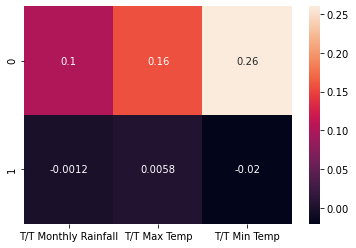

In [20]:
sns.heatmap(df_testingtraining, annot=True)

In [21]:
X = melb_anom[['Month','Year','newsam','dmi','nino','soi']]
Y = melb_anom[['monthly_rain']]

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42) 

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model

print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))


training_score_MIN = linear.score(X_train,Y_train) # calculate rsq for the training set
# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear_MIN = r2_score(Y_test,preds_linear) 
# print the training and testing scores
print("Training score is",np.round(training_score_MIN, 3))
print("Testing score is",np.round(rsquared_linear_MIN, 3))

Coefficients are [[ -0.584   0.142   0.385 -21.948  -7.094  -4.136]]
Intercept is [-277.103]
Training score is 0.108
Testing score is -0.016


In [14]:
#importing Darwin data
var_names = ['darw_monthly_rain','darw_max_temp','darw_min_temp']
file_name = ['IDCJAC0001_014015_Data1.csv','IDCJAC0002_014015_Data1.csv','IDCJAC0004_014015_Data1.csv']
for i in range(3):
    globals()[var_names[i]] = pd.read_csv(file_name[i])
    globals()[var_names[i]] = globals()[var_names[i]][(globals()[var_names[i]]['Year']>=1957) & (globals()[var_names[i]]['Year']<2021)].drop('Product code', axis=1).drop('Quality', axis=1)

darw_monthly_rain.drop('Station number',axis=1)
darw_max_temp.drop('Bureau of Meteorology station number', axis=1)
darw_min_temp.drop('Bureau of Meteorology station number',axis=1)

,Year,Month,Mean minimum temperature (°C)
188,1957,1,24.2
189,1957,2,24.3
190,1957,3,23.9
191,1957,4,24.7
192,1957,5,21.5
...,...,...,...
951,2020,8,21.0
952,2020,9,23.7
953,2020,10,25.3
954,2020,11,25.8


In [22]:
#missing value
for i in range(1,13):
    if melb_weather[melb_weather['Month']==i]['Month'].count()<64:
        print(i)
    else:
        continue
for i in range(1957,2021):
    if melb_weather[melb_weather['Year']==i]['Year'].count()<12:
        print(i)
    else:
        continue

10
2018


In [23]:
#making a new Darwin DataFrame
darw_weather = pd.merge(darw_monthly_rain, darw_max_temp,how='left').merge(darw_min_temp,how='left').merge(dmi,how='left').merge(newsam,how='left').merge(nino,how='left').merge(soi,how='left').dropna(axis=0).reset_index().drop('index',axis=1).drop('Bureau of Meteorology station number',axis=1).rename(columns={'Monthly Precipitation Total (millimetres)':'monthly_rain','Mean maximum temperature (°C)':'max_temp','Mean minimum temperature (°C)':'min_temp'}).drop('Station number',axis=1)
darw_weather

darw_weather[darw_weather['min_temp']==0]

NameError: name 'darw_monthly_rain' is not defined

In [17]:
#calculating monthly averages and creating a dataframe to store values
darw_climat = pd.DataFrame(index= darw_weather['Month'].unique(), columns = ['max_temp','min_temp','monthly_rain'])

for month in darw_weather['Month'].unique():
    max_temp_avg = darw_weather[darw_weather['Month']==month]['max_temp'].mean()
    min_temp_avg = darw_weather[darw_weather['Month']==month]['min_temp'].mean()
    monthly_rain_avg = darw_weather[darw_weather['Month']==month]['monthly_rain'].mean()
    darw_climat['max_temp'][month] = max_temp_avg
    darw_climat['min_temp'][month] = min_temp_avg
    darw_climat['monthly_rain'][month] = monthly_rain_avg
    
#updatting max_temp, min_temp and monthly_rainfall values to show anomalies
darw_anom = darw_weather.copy()

for month in darw_weather['Month'].unique():
    darw_anom.loc[darw_anom['Month']==month, 'max_temp']-=darw_climat['max_temp'][month]
    darw_anom.loc[darw_anom['Month']==month, 'min_temp']-=darw_climat['min_temp'][month]
    darw_anom.loc[darw_anom['Month']==month, 'monthly_rain']-=darw_climat['monthly_rain'][month]
    
darw_anom

,Year,Month,monthly_rain,max_temp,min_temp,dmi,newsam,nino,soi
0,1957,1,111.381250,-1.043750,-0.717187,-0.371,-0.87,-0.56,0.6
1,1957,2,-15.615625,-0.984375,-0.565625,-0.484,-2.27,-0.24,-0.1
2,1957,3,35.206250,-1.128125,-0.739062,-0.097,0.07,0.08,0.2
3,1957,4,-67.578125,-0.484375,0.562500,-0.225,-1.97,0.42,0.2
4,1957,5,-11.037500,-0.468750,-0.748438,-0.247,-2.50,0.45,-0.7
...,...,...,...,...,...,...,...,...,...
763,2020,8,-4.010937,1.048438,0.742188,-0.070,-2.20,-0.42,1.1
764,2020,9,71.687500,1.100000,0.695312,-0.084,-0.25,-0.66,0.9
765,2020,10,98.003125,0.118750,0.412500,0.233,1.79,-1.19,0.5
766,2020,11,-47.015625,1.475000,0.373437,0.143,1.14,-1.01,0.7


In [18]:
X = darw_anom[['Month','Year','newsam','dmi','nino','soi']]
Y = darw_anom[['monthly_rain']]

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42) 

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model

print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

training_score_MIN = linear.score(X_train,Y_train) # calculate rsq for the training set
# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear_MIN = r2_score(Y_test,preds_linear) 
# print the training and testing scores
print("Training score is",np.round(training_score_MIN, 3))
print("Testing score is",np.round(rsquared_linear_MIN, 3))

Coefficients are [[-8.1300e-01 -1.4000e-02 -6.8580e+00  3.9199e+01  9.5050e+00  3.0305e+01]]
Intercept is [39.978]
Training score is 0.06
Testing score is 0.022


In [4]:
#importing Darwin data
var_names = ['cairns_monthly_rain','cairns_max_temp','cairns_min_temp']
file_name = ['data/IDCJAC0001_031011_Data1.csv','data/IDCJAC0002_031011_Data1.csv','data/IDCJAC0004_031011_Data1.csv']
for i in range(3):
    globals()[var_names[i]] = pd.read_csv(file_name[i])
    globals()[var_names[i]] = globals()[var_names[i]][(globals()[var_names[i]]['Year']>=1957) & (globals()[var_names[i]]['Year']<2021)].drop('Product code', axis=1).drop('Quality', axis=1)

cairns_monthly_rain.drop('Station number',axis=1)
cairns_max_temp.drop('Bureau of Meteorology station number', axis=1)
cairns_min_temp.drop('Bureau of Meteorology station number',axis=1)


,Year,Month,Mean minimum temperature (°C)
171,1957,1,22.7
172,1957,2,23.6
173,1957,3,22.5
174,1957,4,21.5
175,1957,5,19.1
...,...,...,...
934,2020,8,17.6
935,2020,9,20.4
936,2020,10,21.2
937,2020,11,22.7


In [24]:
#making a new Darwin DataFrame and checking for 0 values
cairns_weather = pd.merge(cairns_monthly_rain, cairns_max_temp,how='left').merge(cairns_min_temp,how='left').merge(dmi,how='left').merge(newsam,how='left').merge(nino,how='left').merge(soi,how='left').dropna(axis=0).reset_index().drop('index',axis=1).drop('Bureau of Meteorology station number',axis=1).rename(columns={'Monthly Precipitation Total (millimetres)':'monthly_rain','Mean maximum temperature (°C)':'max_temp','Mean minimum temperature (°C)':'min_temp'}).drop('Station number',axis=1)
cairns_weather

cairns_null = cairns_weather[(cairns_weather['min_temp']==0)|(cairns_weather['monthly_rain']==0)|(cairns_weather['monthly_rain']==0)]
cairns_null

,Year,Month,monthly_rain,max_temp,min_temp,dmi,newsam,nino,soi
18,1958,7,0.0,26.4,17.2,-0.966,-1.65,0.04,0.4
69,1962,10,0.0,30.1,21.5,-0.168,-0.36,-0.33,1.0
116,1966,9,0.0,28.0,19.0,0.208,0.43,-0.05,-0.2
189,1972,10,0.0,29.2,18.9,0.487,-1.48,1.77,-0.9
284,1980,9,0.0,27.5,17.7,-0.639,-2.56,-0.12,-0.5
403,1990,8,0.0,26.9,15.3,-0.279,0.12,0.17,-0.2
549,2002,10,0.0,30.7,20.6,0.565,-5.77,1.16,-0.4
748,2019,11,0.0,31.7,21.0,0.958,-4.42,0.74,-0.8


In [25]:
cairns_weather = cairns_weather.drop(cairns_null.index)
for i in ['Year','Month','monthly_rain','max_temp','min_temp','newsam','soi']:
    cairns_weather[i] = pd.to_numeric(cairns_weather[i])
cairns_weather

,Year,Month,monthly_rain,max_temp,min_temp,dmi,newsam,nino,soi
0,1957,1,561.2,30.1,22.7,-0.371,-0.87,-0.56,0.6
1,1957,2,420.6,31.6,23.6,-0.484,-2.27,-0.24,-0.1
2,1957,3,457.4,29.5,22.5,-0.097,0.07,0.08,0.2
3,1957,4,138.5,28.9,21.5,-0.225,-1.97,0.42,0.2
4,1957,5,122.2,26.9,19.1,-0.247,-2.50,0.45,-0.7
...,...,...,...,...,...,...,...,...,...
756,2020,8,10.0,27.9,17.6,-0.070,-2.20,-0.42,1.1
757,2020,9,58.6,28.9,20.4,-0.084,-0.25,-0.66,0.9
758,2020,10,6.8,31.0,21.2,0.233,1.79,-1.19,0.5
759,2020,11,54.4,32.1,22.7,0.143,1.14,-1.01,0.7


In [26]:
#calculating monthly averages and creating a dataframe to store values
cairns_climat = pd.DataFrame(index= cairns_weather['Month'].unique(), columns = ['max_temp','min_temp','monthly_rain'])

for month in cairns_weather['Month'].unique():
    max_temp_avg = cairns_weather[cairns_weather['Month']==month]['max_temp'].mean()
    min_temp_avg = cairns_weather[cairns_weather['Month']==month]['min_temp'].mean()
    monthly_rain_avg = cairns_weather[cairns_weather['Month']==month]['monthly_rain'].mean()
    cairns_climat['max_temp'][month] = max_temp_avg
    cairns_climat['min_temp'][month] = min_temp_avg
    cairns_climat['monthly_rain'][month] = monthly_rain_avg
    
#updatting max_temp, min_temp and monthly_rainfall values to show anomalies
cairns_anom = cairns_weather.copy()

for month in cairns_weather['Month'].unique():
    cairns_anom.loc[cairns_anom['Month']==month, 'max_temp']-=cairns_climat['max_temp'][month]
    cairns_anom.loc[cairns_anom['Month']==month, 'min_temp']-=cairns_climat['min_temp'][month]
    cairns_anom.loc[cairns_anom['Month']==month, 'monthly_rain']-=cairns_climat['monthly_rain'][month]
    
cairns_anom

,Year,Month,monthly_rain,max_temp,min_temp,dmi,newsam,nino,soi
0,1957,1,161.267188,-1.460937,-1.104688,-0.371,-0.87,-0.56,0.6
1,1957,2,-27.685714,0.320635,-0.266667,-0.484,-2.27,-0.24,-0.1
2,1957,3,40.296825,-1.079365,-0.663492,-0.097,0.07,0.08,0.2
3,1957,4,-59.626984,-0.446032,-0.293651,-0.225,-1.97,0.42,0.2
4,1957,5,27.770313,-0.792188,-0.962500,-0.247,-2.50,0.45,-0.7
...,...,...,...,...,...,...,...,...,...
756,2020,8,-15.292063,1.126984,0.173016,-0.070,-2.20,-0.42,1.1
757,2020,9,26.996721,0.593443,1.590164,-0.084,-0.25,-0.66,0.9
758,2020,10,-46.161667,1.358333,0.490000,0.233,1.79,-1.19,0.5
759,2020,11,-38.323810,1.288889,0.260317,0.143,1.14,-1.01,0.7


In [29]:
cairns_anom.corr()

,Year,Month,monthly_rain,max_temp,min_temp,dmi,newsam,nino,soi
Year,1.000000,7.696845e-04,-1.684195e-02,3.776338e-01,1.990424e-01,0.315720,0.211340,0.019447,0.004715
Month,0.000770,1.000000e+00,-1.845989e-16,2.525046e-15,-9.719956e-16,-0.039048,0.017805,0.008755,-0.026034
monthly_rain,-0.016842,-1.845989e-16,1.000000e+00,-4.201380e-01,7.846023e-02,0.037972,0.077796,-0.179729,0.298665
max_temp,0.377634,2.525046e-15,-4.201380e-01,1.000000e+00,4.290065e-01,0.000717,-0.022173,0.006430,0.020028
min_temp,0.199042,-9.719956e-16,7.846023e-02,4.290065e-01,1.000000e+00,-0.153760,0.158310,-0.152271,0.314956
dmi,0.315720,-3.904790e-02,3.797170e-02,7.166608e-04,-1.537599e-01,1.000000,0.111114,0.261848,-0.170710
newsam,0.211340,1.780511e-02,7.779597e-02,-2.217312e-02,1.583100e-01,0.111114,1.000000,-0.056401,0.060010
nino,0.019447,8.754541e-03,-1.797293e-01,6.429916e-03,-1.522709e-01,0.261848,-0.056401,1.000000,-0.725430
soi,0.004715,-2.603402e-02,2.986652e-01,2.002777e-02,3.149561e-01,-0.170710,0.060010,-0.725430,1.000000


Text(0.5, 1.0, 'Cairns_anom Correlation Heatmap')

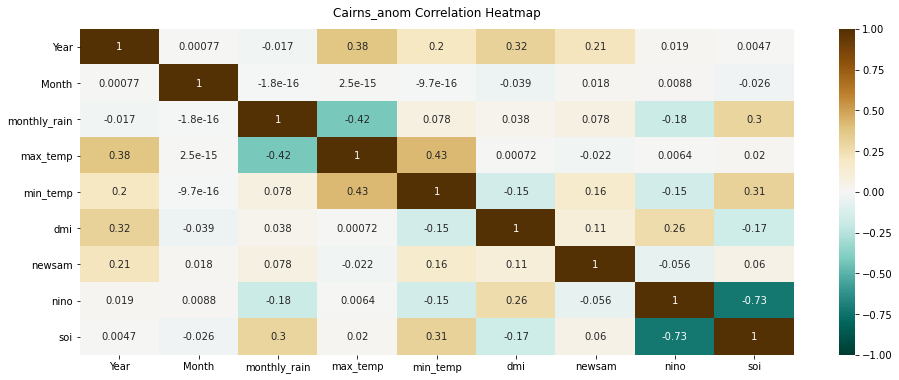

In [31]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cairns_anom.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG_r')
heatmap.set_title('Cairns_anom Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [27]:
X = cairns_anom[['Month','Year','newsam','dmi','nino','soi']]
Y = cairns_anom[['monthly_rain']]

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42) 

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model

print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

training_score_MIN = linear.score(X_train,Y_train) # calculate rsq for the training set
# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear_MIN = r2_score(Y_test,preds_linear) 
# print the training and testing scores
print("Training score is",np.round(training_score_MIN, 3))
print("Testing score is",np.round(rsquared_linear_MIN, 3))

Coefficients are [[10.405 -0.952  1.792 17.967 24.355 62.685]]
Intercept is [1797.642]
Training score is 0.247
Testing score is -0.013
